# Natural Language Processing - twitter_samples dataset

# Natural Language Processing with `nltk`

`nltk` is the most popular Python package for Natural Language processing, it provides algorithms for importing, cleaning, pre-processing text data in human language and then apply computational linguistics algorithms like sentiment analysis.

http://www.nltk.org/

`nltk` also provides access to a dataset of tweets from Twitter, it includes a set of tweets already classified as negative or positive.


## Download and inspect the twitter_samples dataset

It also includes many easy-to-use datasets in the `nltk.corpus` package, we can download for example the `twitter_samples` package using the `nltk.download` function:

In [59]:
import nltk

In [60]:
nltk.download("twitter_samples")
from nltk.corpus import twitter_samples

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/anandkarthick/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


First let's check the common `fileids` method of `nltk` corpora:

In [61]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [62]:
len(twitter_samples.strings('positive_tweets.json'))

5000

The twitter_samples object has a `tokenized()` method that returns all tweets from a fileid already individually tokenized. Read its documentation and use it to find the number of positive and negative tweets.

In [63]:
number_of_positive_tweets = len(twitter_samples.strings('positive_tweets.json'))
print(number_of_positive_tweets)

5000


In [64]:
number_of_negative_tweets = len(twitter_samples.strings('negative_tweets.json'))
print(number_of_negative_tweets)

5000


## Build a bag-of-words model function


The simplest model for analyzing text is just to think about text as an unordered collection of words (bag-of-words). This can generally allow to infer from the text the category, the topic or the sentiment.

From the bag-of-words model we can build features to be used by a classifier, here we assume that each word is a feature that can either be `True` or `False`.
We implement this in Python as a dictionary where for each word in a sentence we associate `True`, if a word is missing, that would be the same as assigning `False`.

In [65]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

First step we define a list of words that we want to filter out of our dataset:

In [66]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)

In [67]:
useless_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [68]:
useless_words[-5:]

['`', '{', '|', '}', '~']

In [70]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
positive_tweets[:5]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days']

## Tokenize Text in Words

The first step in Natural Language processing is generally to split the text into words, this process might appear simple but it is very tedious to handle all corner cases, see for example all the issues with punctuation we have to solve if we just start with a split on whitespace:

In [71]:
positive_tokenized = twitter_samples.tokenized('positive_tweets.json')
negative_tokenized = twitter_samples.tokenized('negative_tweets.json')

In [72]:
positive_tokenized[:2][1]

['@Lamb2ja',
 'Hey',
 'James',
 '!',
 'How',
 'odd',
 ':/',
 'Please',
 'call',
 'our',
 'Contact',
 'Centre',
 'on',
 '02392441234',
 'and',
 'we',
 'will',
 'be',
 'able',
 'to',
 'assist',
 'you',
 ':)',
 'Many',
 'thanks',
 '!']

In [73]:
"""Build a bag of words model"""
    
def build_bag_of_words_features_filtered(words):
    return {
        word:1 for word in words 
        if not word in useless_words}

In [74]:
build_bag_of_words_features_filtered(positive_tokenized[:2][1])

{'02392441234': 1,
 ':)': 1,
 ':/': 1,
 '@Lamb2ja': 1,
 'Centre': 1,
 'Contact': 1,
 'Hey': 1,
 'How': 1,
 'James': 1,
 'Many': 1,
 'Please': 1,
 'able': 1,
 'assist': 1,
 'call': 1,
 'odd': 1,
 'thanks': 1}

## Create a list of all words

Before performing sentiment analysis, let's first inspect the dataset a little bit more by creating a list of all words.

In [75]:
words = []
for dataset in ["positive_tweets.json", "negative_tweets.json"]:
    for tweet in twitter_samples.tokenized(dataset):
        words.extend(tweet)
len(words)

130099

Study the code above, see that it is a case of nested loop, for each dataset we are looping through each tweet. Also notice we are using `extend`, how does it differ from `append`? Try it on a simple case, or read the documentation or Google for it!

Now let's filter out punctuation and stopwords:

In [76]:
filtered_words = []

for x in words:
    if x not in useless_words:
        filtered_words.append(x)
len(filtered_words)

84672

First we want to filter out `useless_words` as defined in the previous section, this will reduce the lenght of the dataset by more than a factor of 2:

## Find the most common words


The `collection` package of the standard library contains a `Counter` class that is handy for counting frequencies of words in our list:

In [77]:
from collections import Counter

counter = Counter(filtered_words)

It also has a `most_common()` method to access the words with the higher count:

In [78]:
most_common_words = counter.most_common()[:10]

In [79]:
most_common_words

[(':(', 4586),
 (':)', 3693),
 ('I', 2477),
 (':-)', 701),
 (':D', 658),
 ('...', 622),
 (':-(', 501),
 ("I'm", 456),
 ('like', 402),
 ('u', 392)]

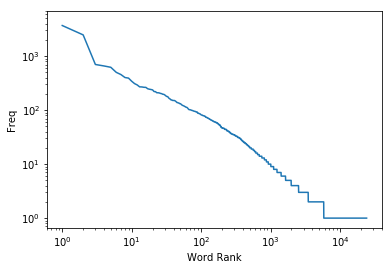

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

sorted_word_counts = sorted(list(counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

## Build the features for machine learning

Using our `build_bag_of_words_features` function we can build separately the negative and positive features.

The format of the positive features should be:

    [
        ( { "here":1, "some":1, "words":1 }, "pos" ),
        ( { "another":1, "tweet":1}, "pos" )
    ]
    
It is a list of tuples, the first element is a dictionary of the words with 1 if that word appears, the second the "pos" or "neg" string.

In [81]:
negative_features = []

for x in negative_tokenized:
    negative_features.append([build_bag_of_words_features_filtered(x),"neg"])

In [82]:
positive_features = []

for x in positive_tokenized:
    positive_features.append([build_bag_of_words_features_filtered(x),"pos"])

In [83]:
positive_features[0]

[{'#FollowFriday': 1,
  ':)': 1,
  '@France_Inte': 1,
  '@Milipol_Paris': 1,
  '@PKuchly57': 1,
  'community': 1,
  'engaged': 1,
  'members': 1,
  'top': 1,
  'week': 1},
 'pos']

In [84]:
negative_features[6]

[{':(': 1, '@RileyMcDonough': 1, 'make': 1, 'smile': 1}, 'neg']

## Train a NaiveBayesClassifier

In [85]:
from nltk.classify import NaiveBayesClassifier

A classifier based on the Naive Bayes algorithm. In order to find the probability for a label, this algorithm first uses the Bayes rule to express P(label|features) in terms of P(label) and P(features|label):

Let's use 80% of the data for training, the rest for validation:

In [86]:
split = int(len(positive_features) * 0.8)

In [87]:
split

4000

In [88]:
classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

We can check after training what is the accuracy on the training set, i.e. the same data used for training, we expect this to be a very high number because the algorithm already "saw" those data. Accuracy is the fraction of the data that is classified correctly, we can turn it into percent:

In [89]:
training_accuracy = nltk.classify.util.accuracy(classifier, positive_features[:split]+negative_features[:split])*100

In [90]:
print(training_accuracy)

99.9625


In [91]:
test_accuracy = nltk.classify.util.accuracy(classifier, positive_features[split:]+negative_features[split:])*100

In [92]:
print(test_accuracy)

99.35000000000001


In [98]:
classifier.classify({'miss': 1, '@RileyMcDonough': 1, 'Thank': 1, 'smile': 1})

'neg'

It looks like the accuracy for the test is very high, check the most informative features below to understand why:

In [51]:
classifier.show_most_informative_features()

Most Informative Features
                      :( = 1                 neg : pos    =   2362.3 : 1.0
                      :) = 1                 pos : neg    =   1139.0 : 1.0
                     See = 1                 pos : neg    =     37.7 : 1.0
                     TOO = 1                 neg : pos    =     36.3 : 1.0
                  THANKS = 1                 neg : pos    =     35.0 : 1.0
                    THAT = 1                 neg : pos    =     27.7 : 1.0
                    miss = 1                 neg : pos    =     26.4 : 1.0
                     sad = 1                 neg : pos    =     25.0 : 1.0
                     x15 = 1                 neg : pos    =     23.7 : 1.0
                   Thank = 1                 pos : neg    =     22.3 : 1.0
